In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import pandas as pd


X = pd.read_csv("/Users/josephlbrown/Desktop/West-Nile-Virus-Prediction/assets/Test_transformed/test_transformed.csv")




In [10]:
X.head()

,Unnamed: 0,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,Tmax,Tmin,rain,Tmax_3,Tmax_20,Spray,Spray_Days_Ago
0,0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,82.75,64.5625,4.015,81.375,74.833333,NaN,NaN
1,1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,82.75,64.5625,4.015,81.375,74.833333,NaN,NaN
2,2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,82.75,64.5625,4.015,81.375,74.833333,NaN,NaN
3,3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,82.75,64.5625,4.015,81.375,74.833333,NaN,NaN
4,4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,82.75,64.5625,4.015,81.375,74.833333,NaN,NaN


In [13]:
X.drop(['Unnamed: 0'], axis=1, inplace=True) 

In [14]:
y = X.pop('Spray')

In [15]:
import pandas_profiling as pdp

pdp.ProfileReport(X)

/Users/josephlbrown/anaconda/lib/python2.7/site-packages/pandas_profiling/base.py:223: RuntimeWarning: divide by zero encountered in long_scalars
  'p_unique': distinct_count / count}


Number of variables,17
Number of observations,116293
Total Missing (%),5.9%
Total size in memory,15.1 MiB
Average record size in memory,136.0 B
Numeric,9
Categorical,6
Date,0
Text (Unique),0
Rejected,2
Distinct count,151


In [16]:
X.describe()

,Id,Block,Latitude,Longitude,AddressAccuracy,Tmax,Tmin,rain,Tmax_3,Tmax_20,Spray_Days_Ago
count,116293.000000,116293.000000,116293.000000,116293.000000,116293.000000,116293.000000,116293.000000,116293.000000,116293.000000,116293.000000,0.0
mean,58147.000000,41.131100,41.849389,-87.693658,7.954357,82.119936,63.652447,2.795702,81.862129,82.425269,NaN
std,33571.041765,24.864726,0.106593,0.080699,1.252733,5.636583,5.473064,3.420483,5.673125,4.412926,NaN
min,1.000000,10.000000,41.644612,-87.930995,3.000000,63.875000,47.625000,0.005000,68.125000,71.452381,NaN
25%,29074.000000,18.000000,41.753411,-87.750938,8.000000,78.500000,60.375000,0.630000,78.000000,80.095238,NaN
50%,58147.000000,39.000000,41.862292,-87.694991,8.000000,82.250000,63.750000,1.795000,82.250000,82.261905,NaN
75%,87220.000000,61.000000,41.951866,-87.648860,9.000000,86.000000,68.062500,4.260000,85.500000,84.976190,NaN
max,116293.000000,98.000000,42.017430,-87.531635,9.000000,96.625000,75.250000,16.160000,94.000000,92.952381,NaN


In [19]:
# Let's build our first model. i always have a oob_score=True. It is good idea to increase n_estimators to a number than
# the default.  In this case the oob_predictions will be based on forest of 33 trees.  I set random_state=42 so that you all
# replicate the model exactly.
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)


#  I only ise numeric_varibles becuase i have yer to dummy out the categorical varibles
model.fit(X[numeric_variables], y)

NameError: name 'numeric_variables' is not defined

In [36]:
# For regression, the oob_score_ atrribute goves the R*2 based on the oob predictions, We want ti use c-stat, but I mention
# for awareness. By the way, attributes in sklearn that have a trailing underscore are only avaiable after the model has been
model.oob_score_

0.075025753474296852

In [37]:
#  Benchmark model
y_oob = model.oob_prediction_
print 'ROC Score: ', roc_auc_score(y, y_oob)

ROC Score:  0.813696252009


In [38]:
#  Here is a simple function to show descriptive stats on the categorical variables
# Just like .describe(), but returns the results for categorical variables
def describe_categorical(X):
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == 'object']].describe().to_html()))
    

In [39]:
describe_categorical(X)

,Date,Depart,WetBulb,Sunrise,Sunset,Depth,Water1,SnowFall,PrecipTotal,StnPressure
count,21012,21012,21012,21012,21012,21012,21012,21012,21012,21012.00
unique,95,29,42,63,59,2,1,3,57,62.00
top,2007-08-01,M,69,-,-,0,M,M,0.00,29.34
freq,1102,10506,1945,10506,10506,10506,21012,10506,7665,2091.00


In [40]:
# drop the variables because both columns have no value in modeling
# X.drop(['Unnamed: 0', 'CodeSum'], axis=1, inplace=True)

In [42]:
categorical_variables = ['Sex', 'Cabin', 'Embarked']

for variable in categorical_variables:
    #Fill missing data with the word "Missing
    X[variable].fillna('Missing', inplace=True)
    #Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    #Update X to include dummies and dop the main variables
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)    
        

In [47]:
X.dtypes

Date                               object
Block                               int64
Latitude                          float64
Longitude                         float64
AddressAccuracy                     int64
NumMosquitos                        int64
Station                             int64
Tmax                                int64
Tmin                                int64
Tavg                                int64
Depart                             object
DewPoint                            int64
WetBulb                            object
Cool                                int64
Sunrise                            object
Sunset                             object
Depth                              object
Water1                             object
SnowFall                           object
PrecipTotal                        object
StnPressure                        object
SeaLevel                          float64
ResultSpeed                       float64
ResultDir                         

In [43]:
X.head()

,Date,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,Station,Tmax,Tmin,Tavg,...,Trap_T230,Trap_T231,Trap_T232,Trap_T233,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903
0,2007-05-29,41,41.954690,-87.800991,9,1,1,88,60,74,...,0,0,0,0,0,0,0,0,0,0
1,2007-05-29,41,41.954690,-87.800991,9,1,2,88,65,77,...,0,0,0,0,0,0,0,0,0,0
2,2007-05-29,41,41.954690,-87.800991,9,1,1,88,60,74,...,0,0,0,0,0,0,0,0,0,0
3,2007-05-29,41,41.954690,-87.800991,9,1,2,88,65,77,...,0,0,0,0,0,0,0,0,0,0
4,2007-05-29,62,41.994991,-87.769279,9,1,1,88,60,74,...,0,0,0,0,0,0,0,0,0,0


In [44]:
#  Look at all columns in dataset
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(X)

,Date,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Cool,Sunrise,Sunset,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Species_CULEX ERRATICUS,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Street_ W ARMITAGE AVENUE,Street_ E 105TH ST,Street_ E 111TH ST,Street_ E 115TH ST,Street_ E 118TH ST,Street_ E 130TH ST,Street_ E 138TH ST,Street_ E 67TH ST,Street_ E 91ST PL,Street_ E 91ST ST,Street_ E RANDOLPH ST,Street_ N ASHLAND AVE,Street_ N ASHLAND AVE OVERPASS,Street_ N AUSTIN AVE,Street_ N AVONDALE AVE,Street_ N CALIFORNIA AVE,Street_ N CAMPBELL AVE,Street_ N CANNON DR,Street_ N CENTRAL PARK DR,Street_ N FRANCISCO AVE,Street_ N HARLEM AVE,Street_ N HUMBOLDT DR,Street_ N KEDVALE AVE,Street_ N LARAMIE AVE,Street_ N LAWLER AVE,Street_ N LEMONT AVE,Street_ N LONG AVE,Street_ N MANDELL AVE,Street_ N MCCLELLAN AVE,Street_ N MILWAUKEE AVE,Street_ N MONT CLARE AVE,Street_ N MOSELL AVE,Street_ N OAK PARK AVE,Street_ N OAKLEY AVE,Street_ N OKETO AVE,Street_ N PITTSBURGH AVE,Street_ N PULASKI RD,Street_ N RICHMOND ST,Street_ N RIDGE AVE,Street_ N RUTHERFORD AVE,Street_ N SPRINGFIELD AVE,Street_ N STAVE ST,Street_ N STREETER DR,Street_ N TRIPP AVE,Street_ N WESTERN AVE,Street_ S ARTESIAN AVE,Street_ S ASHLAND AVE,Street_ S AVENUE G,Street_ S AVENUE L,Street_ S BRANDON,Street_ S CALIFORNIA,Street_ S CALIFORNIA AVE,Street_ S CARPENTER ST,Street_ S CENTRAL AVE,Street_ S CHICAGO AVE,Street_ S CICERO AVE,Street_ S CORNELL AVE,Street_ S COTTAGE GROVE,Street_ S DEARBORN ST,Street_ S DOTY AVE,Street_ S DR MARTIN LUTHER KING JR DR,Street_ S EBERHART AVE,Street_ S HAMLIN AVE,Street_ S HOYNE AVE,Street_ S KEDZIE AVE,Street_ S KILPATRICK AVE,Street_ S KOLMAR,Street_ S KOSTNER AVE,Street_ S LONGWOOD DR,Street_ S MACKINAW,Street_ S MELVINA AVE,Street_ S MILLARD AVE,Street_ S MUSKEGON AVE,Street_ S NORDICA,Street_ S PEORIA ST,Street_ S PULASKI RD,Street_ S RACINE AVE,Street_ S SOUTH SHORE DR,Street_ S STATE ST,Street_ S STONY ISLAND AVE,Street_ S THROOP,Street_ S TORRENCE AVE,Street_ S UNION AVE,Street_ S VINCENNES,Street_ S WALLACE ST,Street_ S WESTERN AVE,Street_ W 104TH ST,Street_ W 113TH ST,Street_ W 116TH ST,Street_ W 127TH PL,Street_ W 18TH ST,Street_ W 31ST ST,Street_ W 37TH PL.,Street_ W 51ST ST,Street_ W 63RD ST,Street_ W 64TH ST,Street_ W 65TH ST,Street_ W 69TH ST,Street_ W 72ND ST,Street_ W 77TH ST,Street_ W 85TH ST,Street_ W 89TH ST,Street_ W 95TH ST,Street_ W ADDISON ST,Street_ W AGATITE AVE,Street_ W BALMORAL AVE,Street_ W BELDEN AVE,Street_ W CHICAGO,Street_ W FARWELL AVE,Street_ W FOSTER AVE,Street_ W FULLERTON AVE,Street_ W GARFIELD BLVD,Street_ W GRAND AVE,Street_ W GRANVILLE AVE,Street_ W GREENLEAF AVE,Street_ W HIGGINS AVE,Street_ W HIGGINS RD,Street_ W LELAND AVE,Street_ W MONTANA ST,Street_ W MONTROSE DR,Street_ W OHARE,Street_ W OHARE AIRPORT,Street_ W PERSHING RD,Street_ W ROOSEVELT,Street_ W ROSCOE ST,Street_ W STRONG ST,Street_ W SUNNYSIDE AVE,Street_ W WEBSTER AVE,"Address_1000 East 67th Street, Chicago, IL 60637, USA","Address_1000 North Central Park Avenue, Chicago, IL 60651, USA","Address_1000 South California Avenue, Chicago, IL 60612, USA","Address_1000 West 95th Street, Chicago, IL 60643, USA","Address_1100 North Artesian Avenue, Chicago, IL 60622, USA","Address_1100 Roosevelt Road, Chicago, IL 60608, USA","Address_1100 South California Avenue, Chicago, IL 60612, USA","Address_1100 South Peoria Street, Chicago, IL 60608, USA","Address_1100 South State Street, Chicago, IL 60605, USA","Address_1100 West Chicago Avenue, Chicago, IL 60642, USA","Address_1200 West Greenleaf Avenue, Chicago, IL 60626, USA","Address_1300 North Laramie Avenue, Chicago, IL 60651, USA","Address_1400 North Sacramento Avenue, Chicago, IL 60622, USA","Address_1500 North Long Avenue, Chicago, IL 60651, USA","Address_1500 West Granville Avenue, Chicago, IL 60660, US

In [49]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X[numeric_variables], y)
print 'ROC Score:', roc_auc_score(y, model.oob_prediction_)

ROC Score: 0.813696252009


In [63]:
model.feature_importances_

array([ 0.0073055 ,  0.22037158,  0.13216443,  0.23365489,  0.18972322,
        0.21678039])

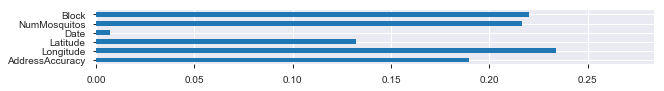

In [62]:
categorical_variables = ['Date', 'Depart', 'Depth', 'SnowFall', 'PrecipTotal', 'StnPressure', 'WetBulb', 'Sunset', 'Sunrise']

def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    if autoscale:
        x_scale = model.feature_importances_.max()+ headroom
    else:
        x_scale =1
        
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns:
        #some dummy columns need to be summarized
        for col_name in summarized_columns:
            #sum all the features that contain col_name, store in temp sum_value
            sum_value = sum(x for i, x in feature_dict.iteritems() if col_name in i)
            
            # now remove all keys that are part of col_name
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i]
            for i in keys_to_remove:
                feature_dict.pop(i)
                #lastly, read the summarized field
                feature_dict[col_name] = sum_value
    
    results = pd.Series(feature_dict.values(), index=feature_dict.keys())
    results.sort_values()
    results.plot(kind="barh", figsize=(width,len(results)/4), xlim=(0,x_scale))
    
graph_feature_importances(model, X.columns, summarized_columns=categorical_variables)

Parameter Test

n_jobs

In [54]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(X[numeric_variables], y)

1 loop, best of 3: 13.1 s per loop


In [ ]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X[numeric_variables], y)

n_estimators (custom grind search)

30 trees
Roc Score: 0.814027005372

50 trees
Roc Score: 0.814106583072

100 trees
Roc Score: 0.813696252009

200 trees
Roc Score: 0.812838763547

500 trees
Roc Score: 0.812007664253

1000 trees
Roc Score: 0.812370868545

2000 trees
Roc Score: 0.812862326932



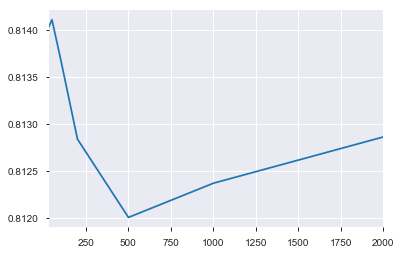

In [57]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X[numeric_variables], y)
    print trees, 'trees'
    roc = roc_auc_score(y, model.oob_prediction_)
    print 'Roc Score:', roc
    results.append(roc)
    print''
    
pd.Series(results, n_estimator_options).plot();
    

Max Features(Bagging Method to make a prediction)

auto option
ROC Score: 0.812370868545

None option
ROC Score: 0.812370868545

sqrt option
ROC Score: 0.812370868545

log2 option
ROC Score: 0.812370868545

0.9 option
ROC Score: 0.812370868545

0.2 option
ROC Score: 0.812370868545



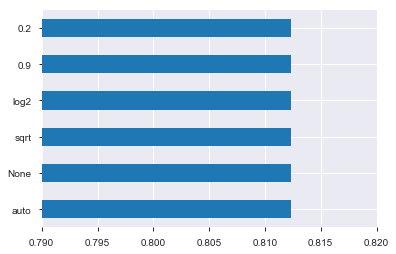

In [59]:
results = []
max_features_options = ['auto', None, 'sqrt', 'log2', 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X[numeric_variables], y)
    print max_features, 'option'
    roc = roc_auc_score(y, model.oob_prediction_)
    print 'ROC Score:', roc
    results.append(roc)
    print''
    
pd.Series(results, max_features_options).plot(kind='barh', xlim=(.79,.82));

min_samples_leaf

1 min samples
C-stat: 0.812370868545

2 min samples
C-stat: 0.812371142008

3 min samples
C-stat: 0.812363257162

4 min samples
C-stat: 0.812346803811

5 min samples
C-stat: 0.812329940267

6 min samples
C-stat: 0.812315765774

7 min samples
C-stat: 0.812279349632

8 min samples
C-stat: 0.81224885852

9 min samples
C-stat: 0.812240244439

10 min samples
C-stat: 0.812220965306



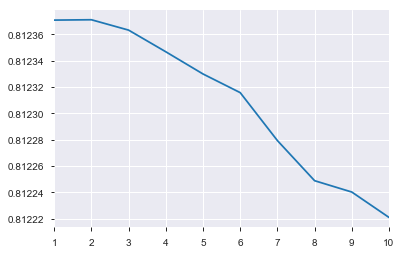

In [60]:
results = []
min_samples_leaf_options = [1,2,3,4,5,6,7,8,9,10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features='auto', min_samples_leaf=min_samples)
    model.fit(X[numeric_variables], y)
    print min_samples, 'min samples'
    roc = roc_auc_score(y, model.oob_prediction_)
    print 'ROC Score:', roc
    results.append(roc)
    print ''
    
pd.Series(results, min_samples_leaf_options).plot();

Final Model

In [61]:
model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features='auto', min_samples_leaf=5)

model.fit(X[numeric_variables], y)
roc = roc_auc_score(y, model.oob_prediction_)
print "ROC Score(Roc vs # of trees:", roc

ROC Score: 0.812329940267
